# Scientific Computing with Python

*March 5, 2024*

**Download the data for today's lesson:**

- [`SMAP_L4_C_mdl_20220901T000000_Vv6040_001.h5`](http://files.ntsg.umt.edu/data/GIS_Programming/data/SMAP_L4_C_mdl_20220901T000000_Vv6040_001.h5)
- [`Tang_et_al_RH.RF.720.360.1980.2016-Yearly.nc`](http://files.ntsg.umt.edu/data/GIS_Programming/data/Tang_et_al_RH.RF.720.360.1980.2016-Yearly.nc)

**Jumpstart Comprehension Check**

We have a satellite image from the Moderate Resolution Imaging Spectrometer (MODIS); its spatial resolution is 500 meters and it has 2400 rows and 2400 columns.

We want to resample the data to 1-km resolution using `rasterio`. **What is the `out_shape` we want?**

```python
ds_modis.read(out_shape = ..., resampling = Resampling.bilinear)
```

**If the affine transformation below is that of the original MODIS image, what will it look like after resampling?** 

```python
>>> from affine import Affine
>>> Affine.from_gdal(*gt)
Affine(463.31271653, 0.0, 18903158.834328,
       0.0, -463.31271653, -1111950.5196609998)
```

In [2]:
import numpy as np

np.random.seed(42)
np.random.randint(0, 100, size = 10)

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [3]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    .. note::
        New code should use the ``integers`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distributi

In [4]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of numpy.random.mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `standard_normal`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    .. note::
        New code should use the ``standard_normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    If positive int_like arguments are provided, `randn` generates an array
    of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1. A single float randomly sampled
    from the distribution is returned if no argument is provided.
 

## Scientific Data Formats

We know these about any geospatial dataset because they are required.

- Spatial reference system / coordinate reference system (this is part of the file 'header')
- Dimensions of the underlying array
- NoData value
- Affine transformation / geotransform
- Data type (32-bit floating point, 16-bit integer etc.)

We also might want to know the following:

- Time of day the data were collected
- Time of year the data represent
- How were the data generated
- Height/elev of the sensor
- Units of measurement
- Citation information
- Resampling info

There is a limit to how many of these things can be put in a file name. 

**Scientific provenance** is the origin of scientifc results. "How did you arrive at that result?"

---

## Bit Packing (and Unpacking)

---

## Hierarchical Data Format (HDF) Files

In [5]:
import h5py

For this lesson, we'll use a modified version of [the NASA Soil Moisture Active Passive (SMAP) Level 4 Carbon (L4C) product,](https://nsidc.org/data/SPL4CMDL/) which is distributed as HDF5 files.

[**Download the example file here**](http://files.ntsg.umt.edu/data/GIS_Programming/data/SMAP_L4_C_mdl_20220901T000000_Vv6040_001.h5) and put it somewhere you can access it from Jupyter Notebook (like your Home directory).

The first step is to open the file for reading.

In [9]:
hdf = h5py.File('data/SMAP_L4_C_mdl_20220901T000000_Vv6040_001.h5', 'r')
hdf

<HDF5 file "SMAP_L4_C_mdl_20220901T000000_Vv6040_001.h5" (mode r)>

In [11]:
# The flags are 'r' (read), 'w' (write) and 'a' append

In [12]:
# This type of file has keys, like a dictionary
hdf.keys()

<KeysViewHDF5 ['EASE2_global_projection', 'EC', 'GEO', 'GPP', 'Metadata', 'NEE', 'QA', 'RH', 'SOC', 'x', 'y']>

In [ ]:
# Keys() shows Groups, which are basically file folders.

In [13]:
hdf.attrs

<Attributes of HDF5 object at 2718864407024>

In [24]:
hdf['EASE2_global_projection'].attrs.keys()

<KeysViewHDF5 ['false_easting', 'false_northing', 'grid_mapping_name', 'longitude_of_central_meridian', 'standard_parallel']>

In [22]:
hdf.attrs['L4_C_PRODUCTION_LEVEL']

b'GMAO'

In [25]:
# This is information which should be included as infomation in the file
hdf['GPP'].keys()

<KeysViewHDF5 ['gpp_mean', 'gpp_pft1_mean', 'gpp_pft2_mean', 'gpp_pft3_mean', 'gpp_pft4_mean', 'gpp_pft5_mean', 'gpp_pft6_mean', 'gpp_pft7_mean', 'gpp_pft8_mean', 'gpp_std_dev']>

In [26]:
hdf['GPP/gpp_mean']

<HDF5 dataset "gpp_mean": shape (1624, 3856), type "<f4">

In [28]:
hdf['GPP/gpp_mean'].attrs.keys()

<KeysViewHDF5 ['DIMENSION_LABELS', 'DIMENSION_LIST', '_FillValue', 'add_offset', 'coordinates', 'grid_mapping', 'long_name', 'missing_value', 'observed_max', 'observed_mean', 'observed_min', 'scale_factor', 'short_name', 'units', 'valid_max', 'valid_min', 'vmax', 'vmin']>

In [29]:
gpp = hdf['GPP/gpp_mean'][:]
gpp

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

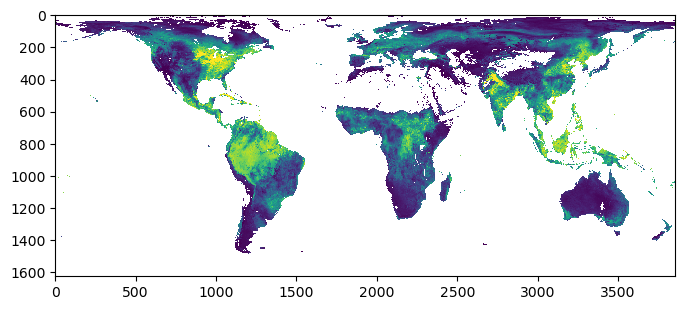

In [32]:
import matplotlib.pyplot as plt

gpp[gpp == -9999] = np.nan

plt.figure(figsize = (8,6))
plt.imshow(gpp, vmax = 12, interpolation = 'nearest')

### Spatial Attributes

In [34]:
hdf['GPP/gpp_mean'].dims

<Dimensions of HDF5 object at 2718955330352>

In [35]:
hdf['GPP/gpp_mean'].dims[0]

<"y" dimension 0 of HDF5 dataset at 2718955336304>

In [36]:
hdf['GPP/gpp_mean'].dims[1]

<"x" dimension 1 of HDF5 dataset at 2718955344096>

In [37]:
gpp.shape

(1624, 3856)

In [38]:
hdf['x']

<HDF5 dataset "x": shape (3856,), type "<f8">

In [39]:
hdf['y']

<HDF5 dataset "y": shape (1624,), type "<f8">

In [40]:
hdf['x'][:]

array([-17363027.18887667, -17354019.70971614, -17345010.91251652, ...,
        17345010.91251652,  17354019.70971614,  17363027.18887667])

In [41]:
hdf['y'][:]

array([ 7310037.03613629,  7301029.05449097,  7292021.01987044, ...,
       -7292021.01987044, -7301029.05449097, -7310037.03613628])

In [42]:
hdf['GEO/latitude']

<HDF5 dataset "latitude": shape (1624, 3856), type "<f4">

In [45]:
# Returns latitude coordinates for each pixel
hdf['GEO/latitude'][:]

array([[ 84.65644,  84.65644,  84.65644, ...,  84.65644,  84.65644,
         84.65644],
       [ 83.95423,  83.95423,  83.95423, ...,  83.95423,  83.95423,
         83.95423],
       [ 83.32523,  83.32523,  83.32523, ...,  83.32523,  83.32523,
         83.32523],
       ...,
       [-83.32523, -83.32523, -83.32523, ..., -83.32523, -83.32523,
        -83.32523],
       [-83.95423, -83.95423, -83.95423, ..., -83.95423, -83.95423,
        -83.95423],
       [-84.65644, -84.65644, -84.65644, ..., -84.65644, -84.65644,
        -84.65644]], dtype=float32)

In [46]:
# In this, we have all the information we need to convrt this to a GeoTIFF by 
# getting the information from the affine transofrmation

### Creating HDF5 Files

In [48]:
hdf.close()

In [49]:
with h5py.File('output.h5', 'a') as hdf:
    # Inside this indented code block, we work with a file:
    dataset = hdf.create_dataset('gpp', data = gpp)
    dataset.attrs['units'] = 'grams carbon per meter squared per day'

# Out here, the file is closed!

In [50]:
hdf

<Closed HDF5 file>

---

## NetCDF Files

Newer versions of netCDF files are based on the HDF5 standard and you'll see a similarity when opening netCDF4 files in Python.

[For this example, we'll use a dataset on global soil heterotrohpic respiration flux.](https://essd.copernicus.org/articles/12/1037/2020/) This is the flux of carbon dioxide from the soil to the atmosphere that occurs when soil micro-organisms break down organic matter in the soil.

[You can download the data here.](http://files.ntsg.umt.edu/data/GIS_Programming/data/Tang_et_al_RH.RF.720.360.1980.2016-Yearly.nc)

In [51]:
import netCDF4

nc = netCDF4.Dataset('data/Tang_et_al_RH.RF.720.360.1980.2016-Yearly.nc', 'r')
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    created_by: R, packages ncdf4 and raster (version 3.0-7)
    date: 2019-12-15 18:09:16
    dimensions(sizes): longitude(720), latitude(360), Year(37)
    variables(dimensions): int32 crs(), float64 longitude(longitude), float64 latitude(latitude), float64 Year(Year), float32 RH(Year, latitude, longitude)
    groups: 

In [54]:
# We can see that netCDF4 files have coordinate systems
nc.variables['RH']

<class 'netCDF4._netCDF4.Variable'>
float32 RH(Year, latitude, longitude)
    units: g C m^-2 yr^-1
    _FillValue: -9999.0
    long_name: Year RH
    grid_mapping: crs
    proj4: +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0
    min: [44.58389282 45.0615387  44.32300949 44.58389282 45.05245972 44.28950882
 44.9914093  44.59019089 44.57655716 45.11477661 44.58389282 45.26540756
 43.50894165 44.58389282 44.49834061 45.02802277 45.12087631 44.25072479
 44.58389282 44.32300949 44.59540939 44.78913879 45.01255798 44.58389282
 44.70819092 44.58389282 44.24215698 44.94690704 45.29517365 44.86605835
 44.55195999 44.95250702 45.4526062  46.15000916 45.28319168 44.51749039
 46.04847717]
    max: [821.66033936 807.81390381 814.94622803 813.13146973 806.52392578
 802.02069092 811.45465088 806.7220459  810.68896484 804.63037109
 817.18713379 820.27154541 822.60528564 810.26086426 811.39770508
 823.04803467 817.42120361 825.80780029 815.27416992 815.31518555
 803.17095947 809.14654541 817.

In [55]:
# When you ask for an array from a netCDF4 file, it always returns a masked array
# Masked arrays are very slow to work with
first = nc.variables['RH'][0]
first = np.array(first) # We can get around that by converting to a regular array here
first

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

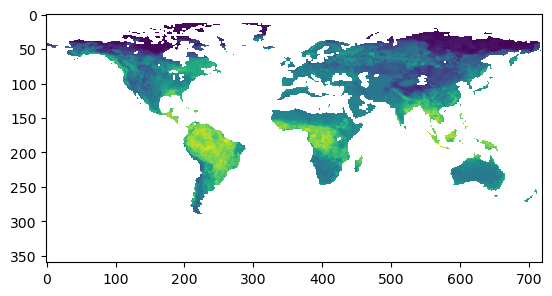

In [59]:
plt.imshow(nc.variables['RH'][0])

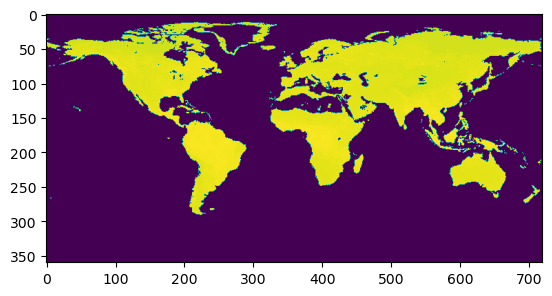

In [60]:
# We can see that it will come out differently if you convert it to an array
plt.imshow(first)

### Check out the table below for syntax differences between HDF5 and netCDF4

Let's take stock:

|                              |  HDF5                              | netCDF4                                |
|:-----------------------------|:-----------------------------------|:---------------------------------------|
|Module name                   | `h5py`                             | `netCDF4`                              |
|Files opened with...          | `hdf = h5py.File(...)`             | `nc = netCDF4.Dataset()`               |
|Datasets/groups viewed with...| `hdf.keys()`                       | `nc.variables` or `nc.variables.keys()`|
|                              | `hdf['group_name'].keys()`         | `nc.variables['group_name'].keys()`    |
|Datasets accessed through...  | `hdf`                              | `nc.variables`                         |
|Attributes listed through...  | `hdf['dataset'].attrs`             | `nc.variables['dataset'].ncattrs()`    |
|Attributes read by...         | `hdf['dataset'].attrs['attribute']`| `nc.variables['dataset'].getncattr()`  |

**How can we read the data?**

---

## More Resources

- NEON Science: [Hierarchical Data Formats - What is HDF5?](https://www.neonscience.org/resources/learning-hub/tutorials/about-hdf5)
- [Dezerae Cox: On using HDF5 in Python with `pandas`](https://dezeraecox.com/toolbox-talk-hdf5-files/)